# Classification

###  Aim of the Experiment:
In this assignment, we will focus on classification, which is a supervised machine learning method where the model tries to predict the correct label of a given input data. In classification, the model is fully trained using the training data, and then it is evaluated on test data before being used to perform prediction on new unseen data.

### Classification:
Classification is the process of predicting the class (or category) of a given data point based on a trained model. The model is trained on a labeled dataset, where the correct class of each data point is specified. During the training process, the model learns the relationship between the data points and their corresponding classes. Once trained, the model can then be used to predict the class of a new, unseen data point by applying the learned relationships.

Classification Algorithms can be further divided into the mainly two category:

#### ● Linear Models

Linear models predicts a class label based on a linear combination of the input features. These models are called "linear" because they make predictions using a linear function of the input features. There are several types of linear classification models, including Logistic Regression and Support Vector Machines (SVMs). These models differ in the way that they estimate the parameters of the linear function and make predictions, but they all use a linear function to predict the class of a data point.

#### ● Non-linear Models

Non-linear classification models are a type of supervised machine learning algorithm that can predict a class label based on non-linear relationships between the input features and the class labels. There are many different types of non-linear classification models, including K-Nearest Neighbors, Decision Trees and Naive Bayes. These models differ in the way that they model the non-linear relationships between the features and the classes, but they all use a non-linear function to make predictions.

#### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import scikitplot as skplt

### Preprocessing

#### First, I read the dataset using the read_csv function of the pandas library and use it as dataframe.

In [2]:
df = pd.read_csv('data.csv')

print("Length of Dataframe:", len(df))
df.head()

Length of Dataframe: 78096


,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?


#### I'm checking for null values in the dataset.

In [3]:
nulls = df.isnull().sum(axis=1)
nulls.sum()

0

#### Dropping the unnecesary columns

In [4]:
# First row of dataframe is all zero

df = df.drop(0)

# Filter the columns with more than 10000 "?" values

question_mark_counts = df.isin(["?"]).sum()
columns_to_drop = question_mark_counts[question_mark_counts > 10000].index

# Drop the columns ("User" has no info)

df = df.drop(['User'], axis=1)
df = df.drop(columns_to_drop, axis=1)
df.head()

,Class,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4
1,1,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725
2,1,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239
3,1,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.8353875680762,68.9079249764243,-71.1383441365739,61.6864271910576,11.7934398850428,-68.88931646056
4,1,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.5961571288978,11.2506481750465,-68.9564252307431,77.3872254123912,42.7178334810919,-72.0151462991019
5,1,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,86.3687480605765,67.9012603746826,-72.4446499648169,61.2754021959714,10.8411094568665,-69.2799064015993


#### The type of the dataset is in the wrong format because the dataset contains values with a question mark instead of nan. I change the type to numeric.

In [5]:
column_types = df.dtypes
for column, dtype in column_types.items():
    if dtype == "object":
        df[column] = df[column].apply(pd.to_numeric, errors="coerce")

#### Statistical Summary

In [6]:
df.describe()

,Class,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4
count,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,77405.000000,77405.000000,77405.000000,74975.000000,74975.000000,74975.000000
mean,2.983776,50.346308,85.813150,-29.985096,49.595844,86.193751,-29.509579,48.612744,83.772387,-30.560906,48.492574,82.064324,-31.146643,48.406087,80.419506,-31.993556
std,1.421152,32.695886,40.203448,34.361971,32.477961,40.452297,34.764460,33.605155,41.022710,35.120384,33.873116,41.571227,35.933363,34.226361,42.623146,36.398277
min,1.000000,-108.552738,-98.233756,-126.770872,-111.685241,-96.142589,-166.006838,-106.886524,-100.789312,-129.595296,-111.761053,-97.603414,-143.540529,-99.107635,-97.948829,-157.199089
25%,2.000000,29.295141,63.497746,-56.356593,28.755679,64.156450,-57.360408,25.173405,58.053733,-58.654339,23.861711,54.072442,-59.369655,22.829056,48.960422,-60.548201
50%,3.000000,54.620245,86.526334,-30.864248,54.215714,87.543493,-30.185331,53.814592,86.459935,-32.356535,54.136687,85.749842,-34.015893,53.856778,85.777670,-35.165459
75%,4.000000,72.488833,113.108673,-1.419462,71.763080,116.228881,-0.368080,71.561988,106.661720,-0.946134,71.435593,105.531551,-1.439540,71.970195,105.483241,-2.141662
max,5.000000,190.017835,169.175464,113.345119,188.691997,170.209350,104.697852,188.760168,168.186466,104.590879,151.033472,168.292018,129.316870,172.275978,168.258643,119.237203


#### Filling the NaN values (which were '?' before numeric type) with mean.

In [7]:
df = df.fillna(df.mean())

#### Printing all values of the features with scatter plot.

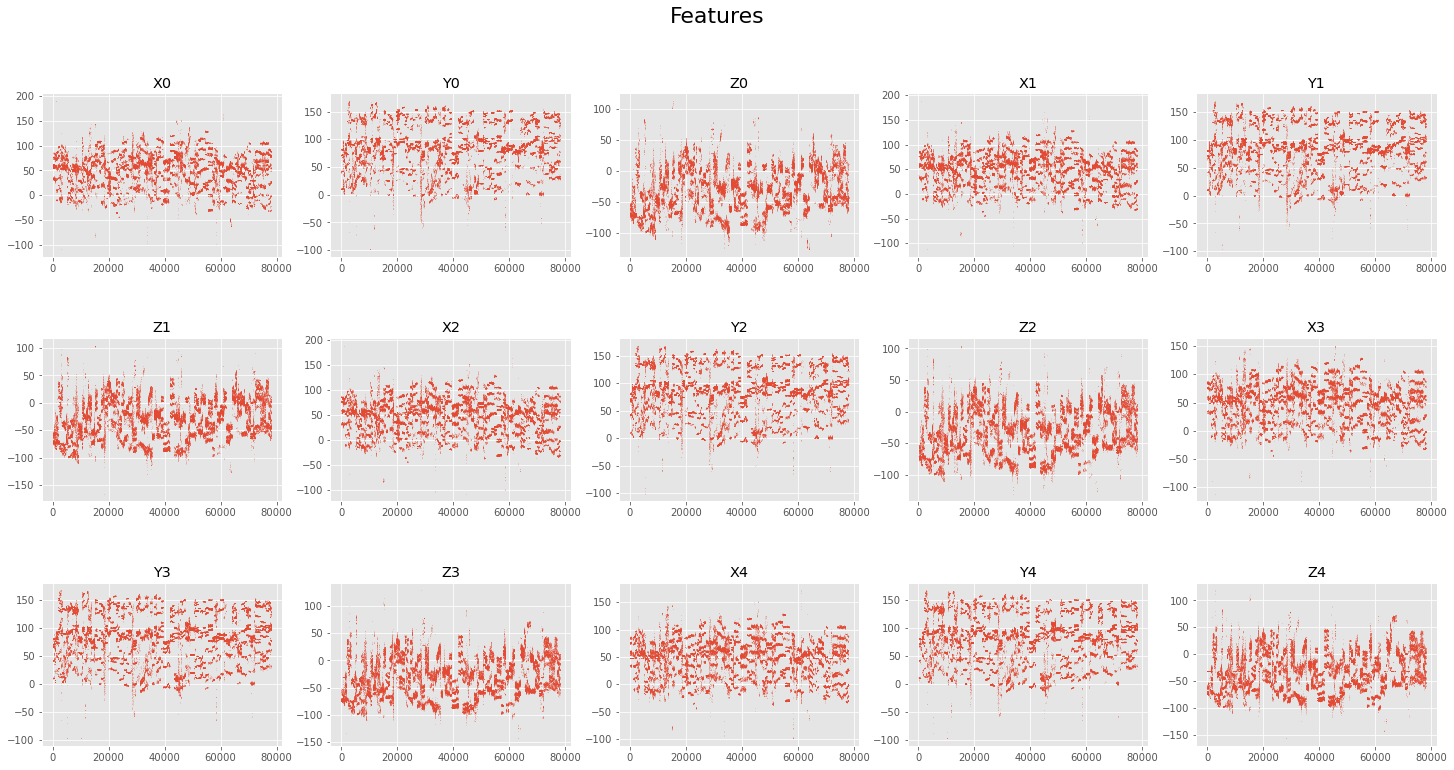

In [8]:
column_names = df.columns[1:]

fig, ax = plt.subplots(3,5, figsize=(25, 12))

ax = ax.flatten()

for i, column_name in enumerate(column_names):
    ax[i].scatter(df.index, df[column_name], s=0.01)
    ax[i].set_title(column_name)

plt.subplots_adjust(hspace=0.5)
plt.suptitle('Features', fontsize=22)
plt.show()

#### Using the boxplot chart, we can easily see the presence of noises in the data set..

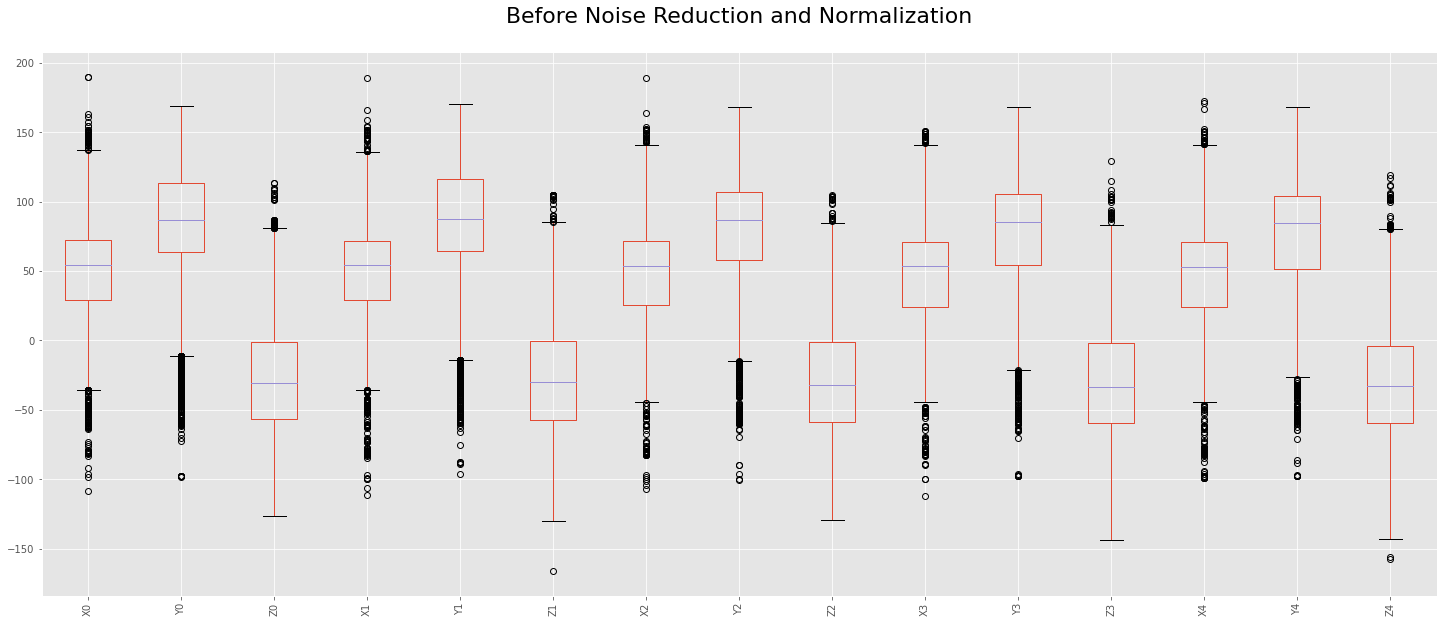

In [9]:
df.drop('Class', axis=1).boxplot(figsize=(25,10), rot=90)
plt.title('Before Noise Reduction and Normalization\n', fontsize=22)
plt.show()

### Noise Reduction and Min-Max Scaling

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df = df_out

def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

for col in df.columns:
    df[col] = min_max_scaling(df[col])

df.head()

,Class,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4
1,0.0,0.519603,0.457367,0.275908,0.657680,0.306014,0.232050,0.438169,0.527350,0.332016,0.699140,0.469574,0.263119,0.559566,0.190495,0.230983
2,0.0,0.532710,0.461809,0.290194,0.437116,0.523727,0.345285,0.669103,0.317395,0.248932,0.711097,0.473012,0.277196,0.572514,0.196151,0.243544
3,0.0,0.528786,0.462933,0.287073,0.430415,0.524231,0.340353,0.664917,0.319107,0.245641,0.707780,0.475687,0.275144,0.573048,0.196220,0.243229
4,0.0,0.525774,0.458703,0.281472,0.422080,0.520089,0.329869,0.707572,0.453775,0.237996,0.571748,0.171509,0.285451,0.657792,0.355082,0.227336
5,0.0,0.524690,0.457194,0.279043,0.419825,0.518394,0.326338,0.656973,0.312875,0.236310,0.705265,0.470376,0.268974,0.570829,0.191328,0.241243


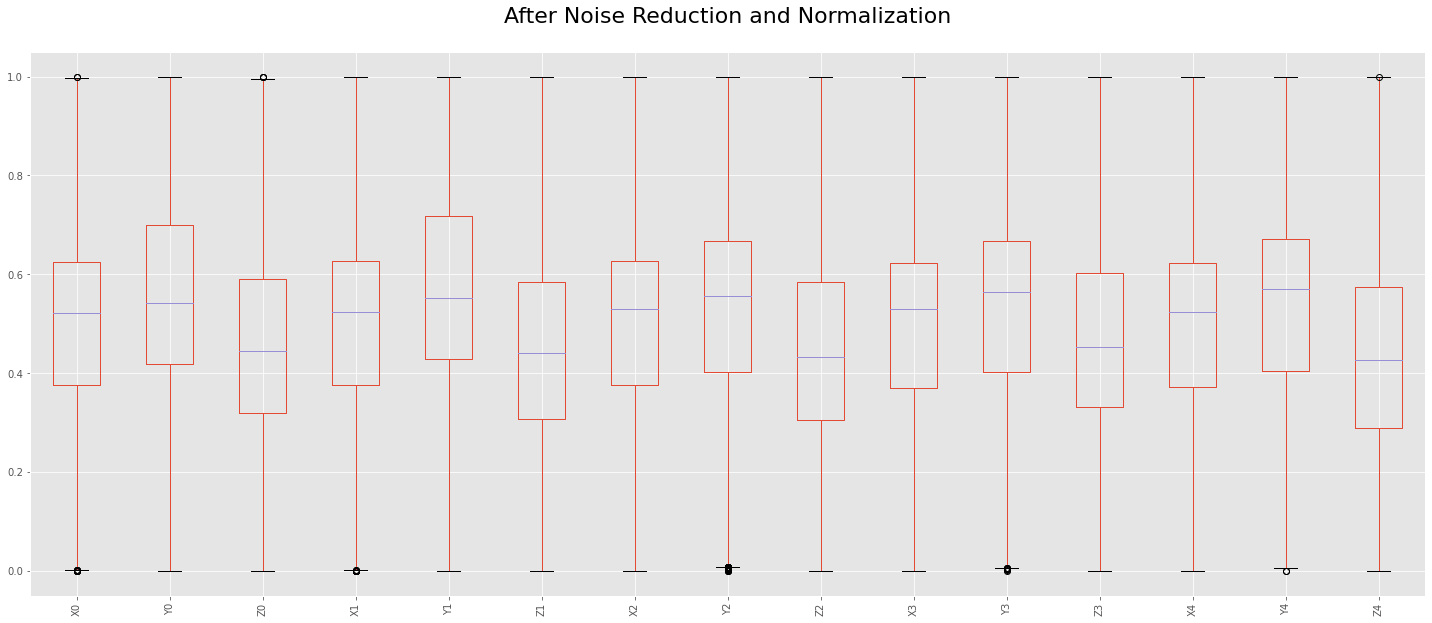

In [11]:
df.drop('Class',axis=1).boxplot(figsize=(25,10), rot=90)
plt.title('After Noise Reduction and Normalization\n', fontsize=22)
plt.show()

#### I use Pearson Correlation to see similar attributes but there aren't very similar features

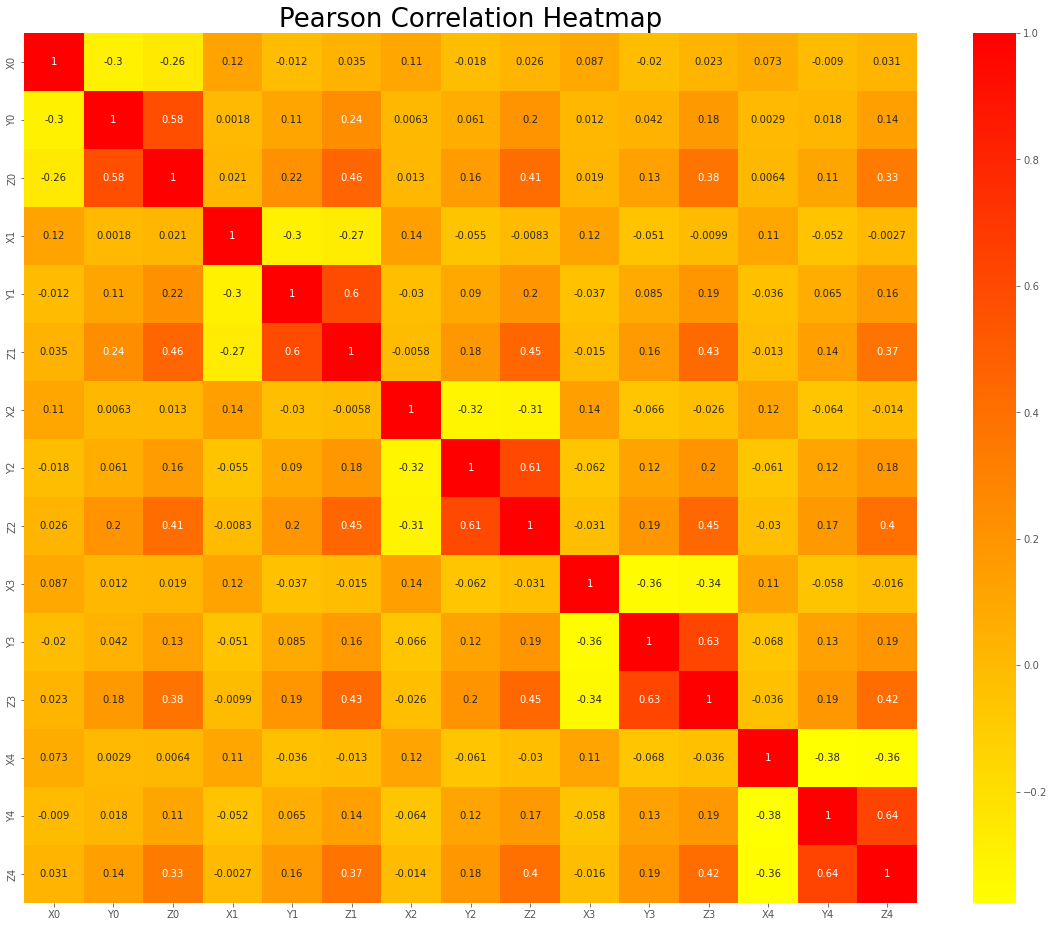

In [12]:
fig, ax = plt.subplots(figsize=(20,16))  
sns.heatmap(df.drop('Class',axis=1).corr(),annot=True,cmap="autumn_r")
plt.title('Pearson Correlation Heatmap', fontsize=26)
plt.show()

#### Seperate the target column and split the data for train and test.

In [13]:
y = df['Class']
X = df.drop('Class',axis=1)

#convert y values to categorical values

lab = preprocessing.LabelEncoder()
y = lab.fit_transform(y)

# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

#### I wrote a function that takes a classification model as a parameter, fits the model, prints its accuracies on the screen, visualize the confusion matrix, ROC and precision-recall graphics. It returns the accuracy score to compare the classification models later.

In [14]:
def predict_and_show_charts(model, name):
    
    # Fit the model
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    # Print train and test accuracy
    
    print('Accuracy of ' + name + ' on training set: {:.2f}'.format(model.score(X_train, y_train)))
    print('Accuracy of ' + name + ' on test set: {:.2f}'.format(model.score(X_test, y_test)))
    
    # Plot confusion matrix 
    
    cm = confusion_matrix(y_test, pred)

    plt.figure(figsize=(16,14))
    
    sentiment_classes = ['Class-0', 'Class-1', 'Class-2', 'Class-3', 'Class-4']
    ax = sns.heatmap(cm, cmap = plt.cm.Reds, annot = True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title(name + ' Confusion Matrix\n', fontsize=20)
    plt.xlabel('\nTrue Label', fontsize=16)
    plt.ylabel('Predicted Label\n', fontsize=16)
    plt.show()
    
    # Plot ROC & Precision-Recall Curve

    Y_test_probs = model.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, Y_test_probs, title = name + " ROC Curve", figsize=(12,6))
    skplt.metrics.plot_precision_recall(y_test, Y_test_probs, title = name + " Precision-Recall Curve", figsize=(12,6))
    
    # return test accuracy scores to compare classifications
    
    return model.score(X_test, y_test)

## Classification

### ○ Logistic Regression

Logistic regression is a widely used linear classification method that is used to generally predict a binary outcome (e.g., 0 or 1, True or False). The logistic regression algorithm estimates the parameters of the logistic function by maximizing the likelihood that the observed data points are drawn from the predicted class probabilities.

Logistic regression could not produce good results in this study because the dataset we use consists of 5 classes.

Accuracy of Logistic Regression Classifier on training set: 0.63
Accuracy of Logistic Regression Classifier on test set: 0.62


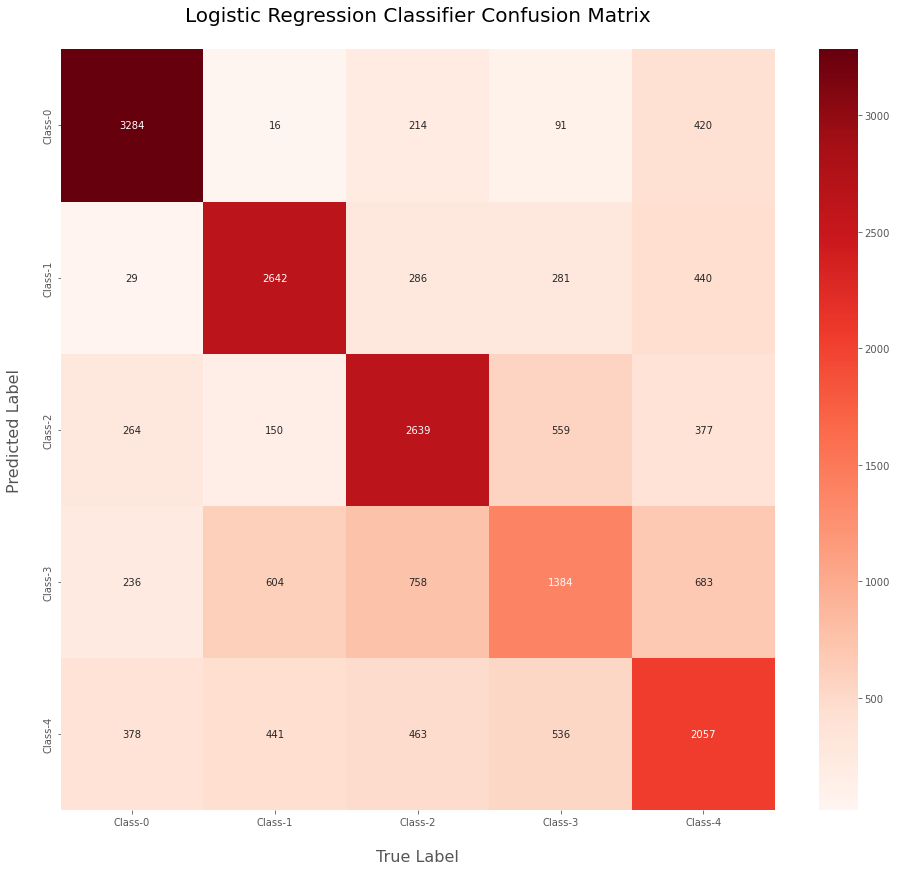

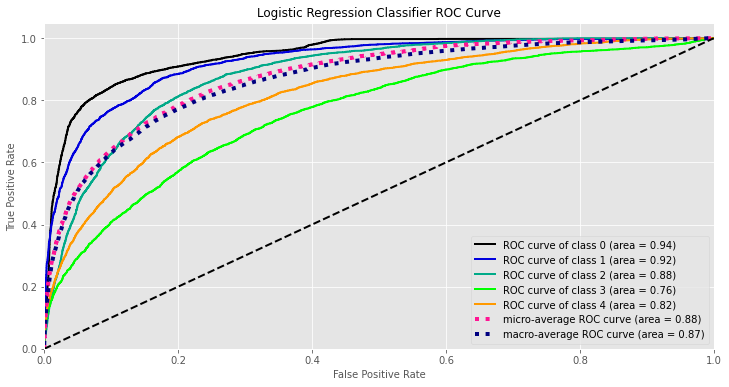

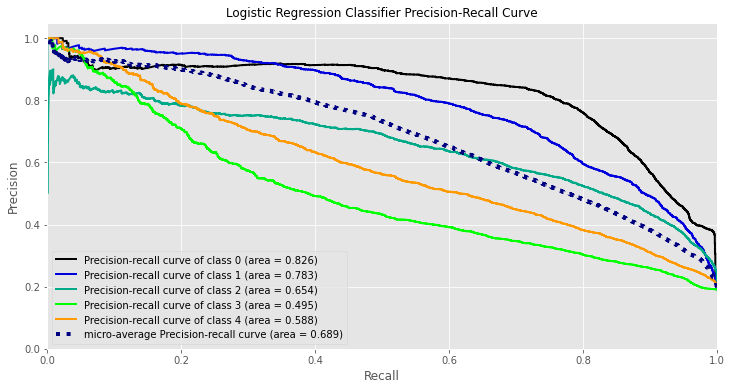

In [15]:
logreg = LogisticRegression()
logreg_score = predict_and_show_charts(logreg, "Logistic Regression Classifier")

### ○ Naive Bayes

The "Naive" assumption of the Naive Bayes algorithm is that the features are independent of each other, which means that the presence or absence of a particular feature does not depend on the presence or absence of any other feature. This assumption is often not realistic, but the algorithm can still perform well in practice, especially for high-dimensional datasets where the number of features is large compared to the number of data points. Gaussian Naive Bayes is used for continuous data, where the features are assumed to be distributed according to a Gaussian distribution.

I used Gaussian Naive Bayes, which is generally used in continuous data, in the project and I wanted to see the results.

Accuracy of Naive Bayes Classifier on training set: 0.67
Accuracy of Naive Bayes Classifier on test set: 0.67


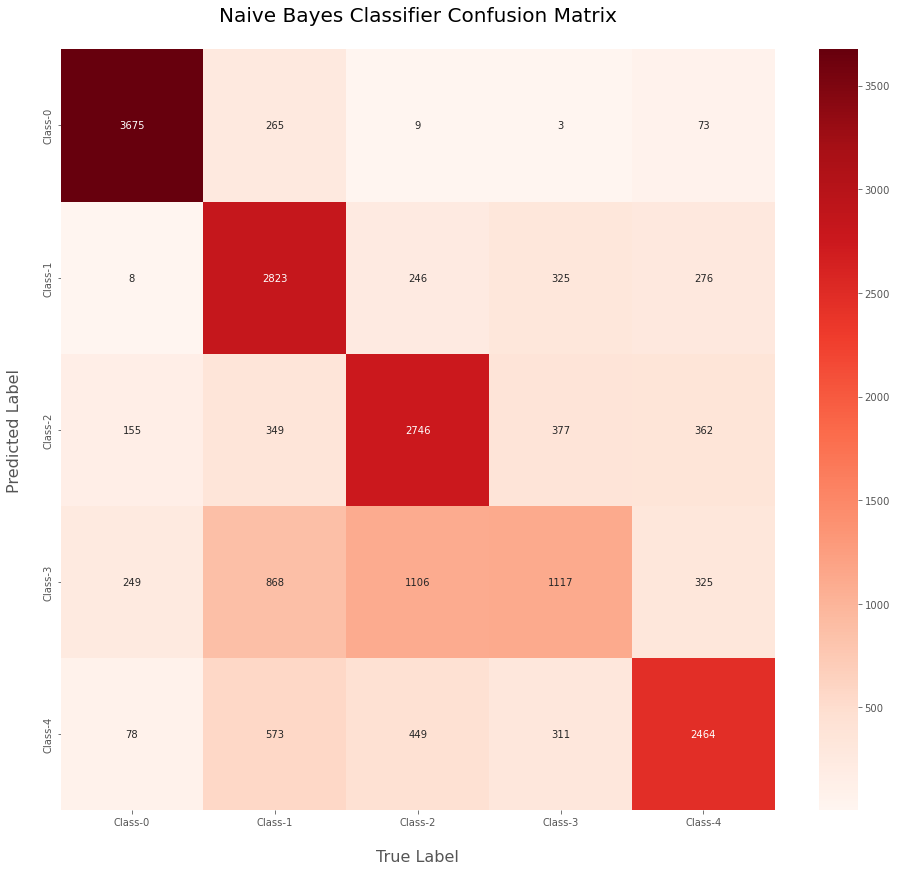

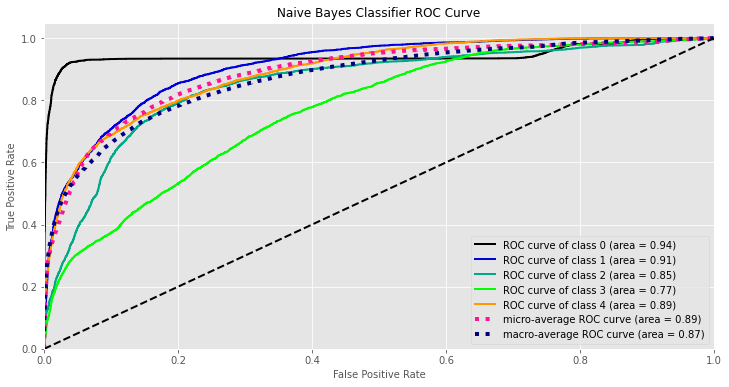

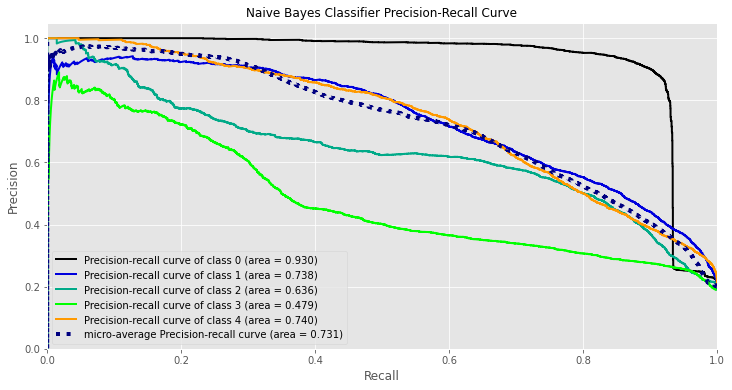

In [16]:
gnb = GaussianNB()
gnb_score = predict_and_show_charts(gnb, "Naive Bayes Classifier")

### ○ K-Nearest Neighbors

KNN is a simple and intuitive classification method, and it is easy to implement. However, it can be computationally expensive to calculate the distances between the new data point and all the points in the training set, especially for large datasets. It's lazy learning classification algorithm because it does not learn a model from the training data, but instead waits until a new data point is encountered and then makes a prediction based on the labels of the "nearest neighbors" to that data point.

Accuracy of K-Neighbors Classifier on training set: 0.93
Accuracy of K-Neighbors Classifier on test set: 0.89


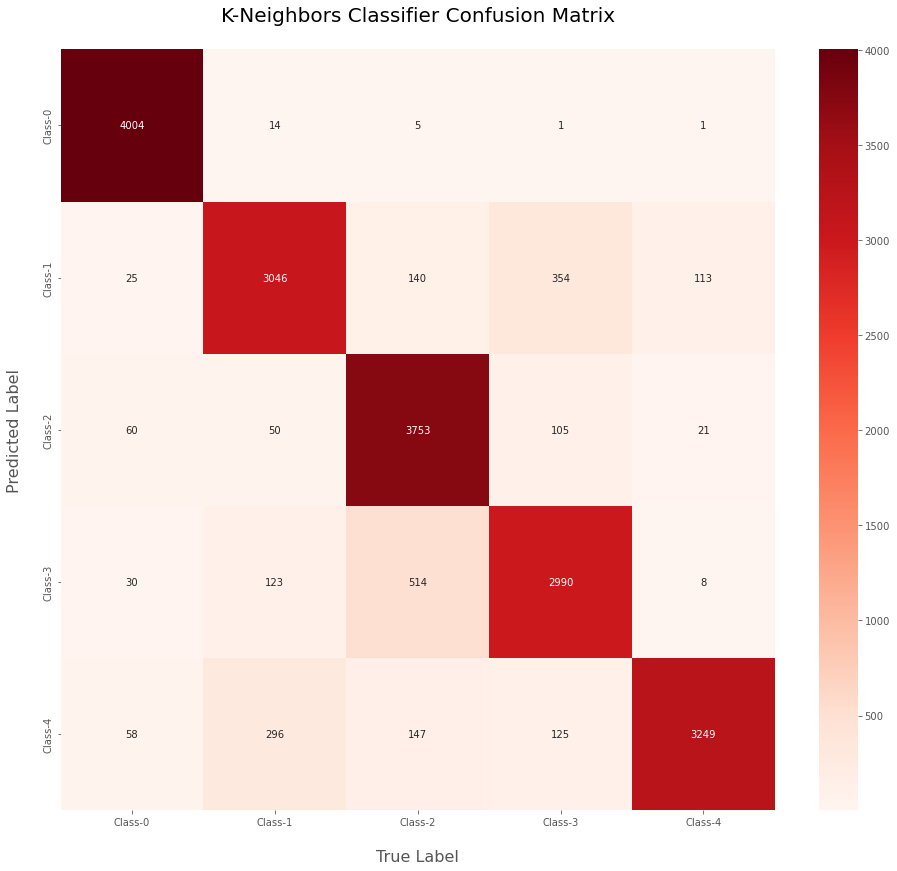

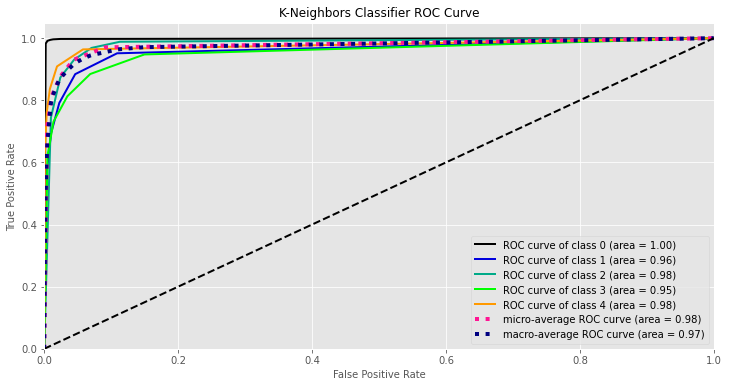

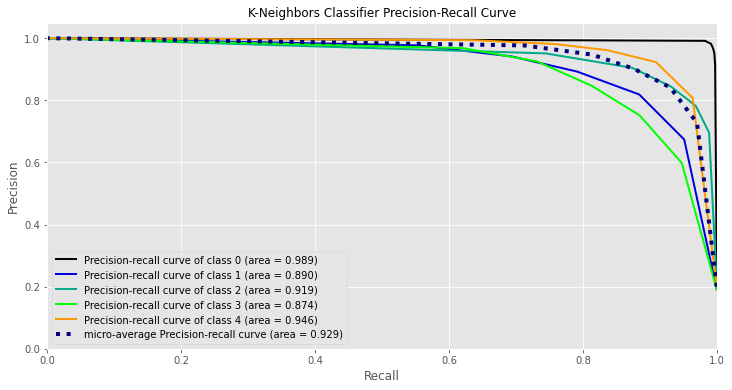

In [17]:
knn = KNeighborsClassifier()
knn_score = predict_and_show_charts(knn, "K-Neighbors Classifier")

### ○ Decision Tree Classification

 They are called "decision trees" because they represent the decisions that are made based on the input features, and the tree structure is used to make predictions about the class or value of a given data point. To build a decision tree, the algorithm first selects the feature that is most predictive of the target class. It then splits the training data into two or more subsets based on the values of this feature, and the process is repeated for each subset. This process is repeated until the tree is fully grown, which means that the leaves of the tree contain only data points from a single class.

Accuracy of Decision Tree Classifier on training set: 1.00
Accuracy of Decision Tree Classifier on test set: 0.91


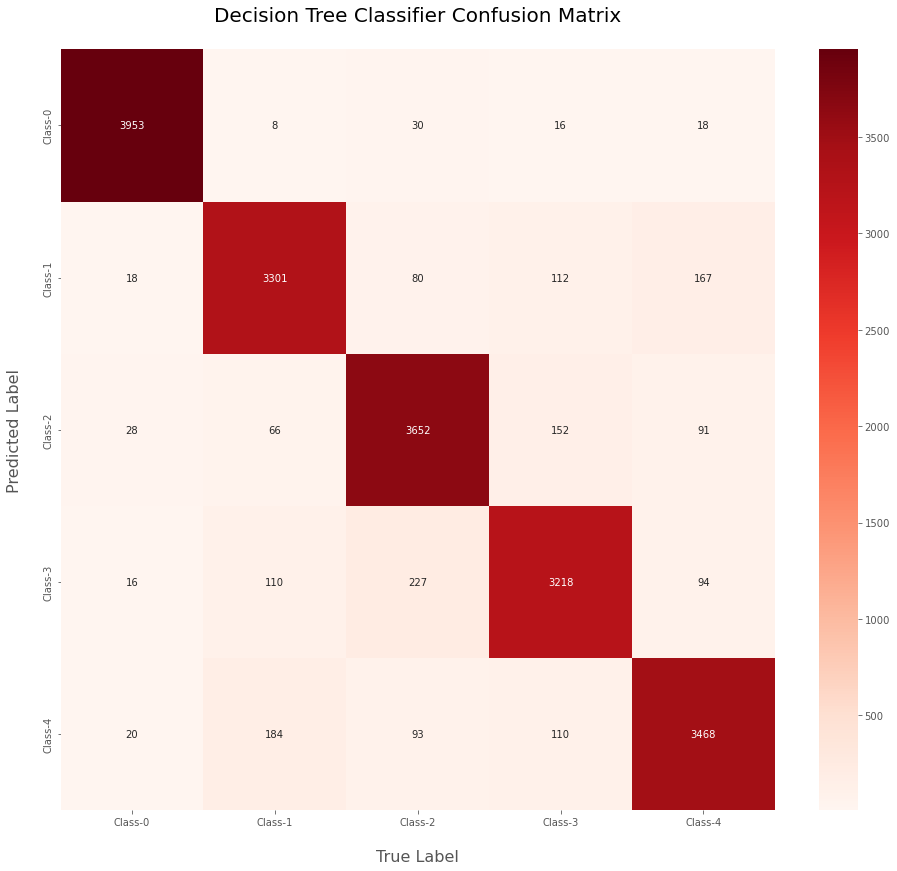

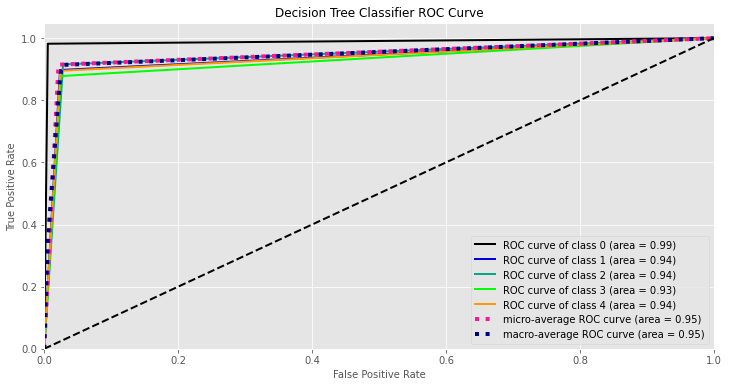

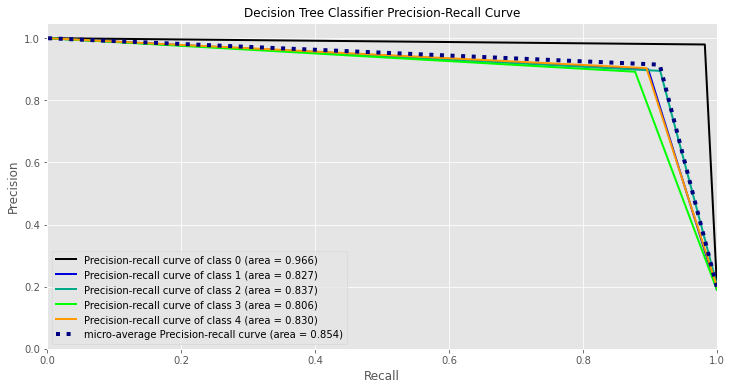

In [18]:
dt = DecisionTreeClassifier()
dt_score = predict_and_show_charts(dt, "Decision Tree Classifier")

### Comparison of Classifiers

Among the models I tried, Decision Tree Classification gave the highest test accuracy. Each model has different datasets that will give better results. For example, if we do binary classification, logistic regression, naive bayes would give much better results if we work with a continuous dataset.

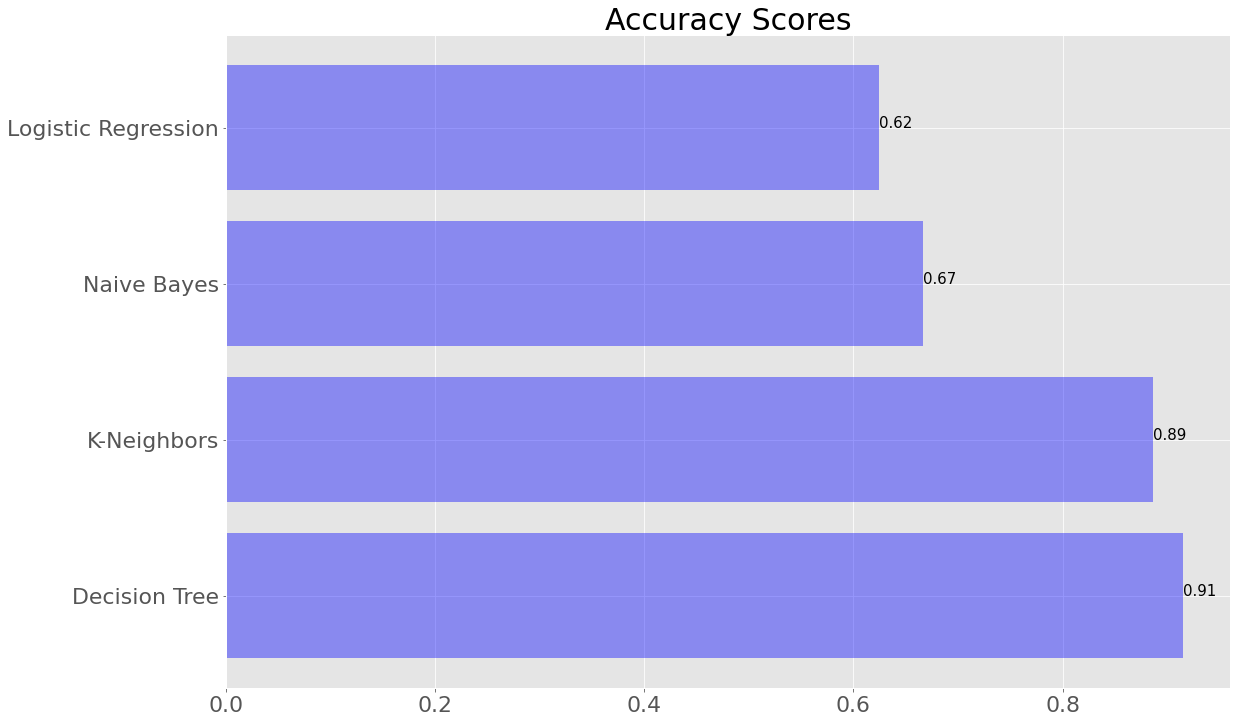

In [20]:
classifier_list = ['Decision Tree', 'K-Neighbors', 'Naive Bayes', 'Logistic Regression']
acc_scores = [dt_score, knn_score, gnb_score, logreg_score]

plt.figure(figsize=(18,12))
plt.barh(classifier_list, acc_scores, color='blue', alpha = 0.4)
plt.title("Accuracy Scores", fontsize = 30)
for i, v in enumerate(acc_scores):
    plt.text(v, i, '{:.2f}'.format(v), fontsize=15)
plt.rcParams.update({'font.size': 22})
plt.show()